In [1]:
import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)    # reproducible

In [2]:
# Data
x = torch.unsqueeze(torch.linspace(-15, 15, 50), dim=1)
y = (4 * x) + (7 * torch.rand(x.size()))

# torch can only train on Variable, so convert them to Variable
x = Variable(x)
y = Variable(y)

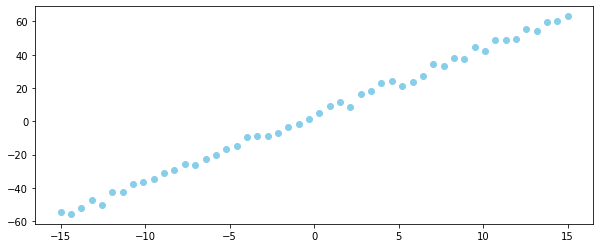

In [3]:
# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "skyblue")
plt.show()

In [4]:
# Model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self, x):
        yP = self.linear(x)
        return yP

In [5]:
model = Model()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Training loop
epochs = 2500

lossV = []

for epoch in range(epochs):
    # 0) Clear gradient buffers
    optimizer.zero_grad()
    
    # 1) Forward pass: Compute predicted y by passing x to the model
    yP = model(x)

    # 2) Compute and print loss
    loss = criterion(y, yP)
    lossV.append(loss.item())
    
    if(epoch % 100 == 0):
        print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # Zero gradients, perform a backward pass, and update the weights.    
    loss.backward()
    optimizer.step()


Epoch: 0 | Loss: 1939.220458984375 
Epoch: 100 | Loss: 3.6276209354400635 
Epoch: 200 | Loss: 3.338583469390869 
Epoch: 300 | Loss: 3.3335001468658447 
Epoch: 400 | Loss: 3.3334102630615234 
Epoch: 500 | Loss: 3.3334097862243652 
Epoch: 600 | Loss: 3.3334085941314697 
Epoch: 700 | Loss: 3.333409070968628 
Epoch: 800 | Loss: 3.333409070968628 
Epoch: 900 | Loss: 3.333409070968628 
Epoch: 1000 | Loss: 3.333409070968628 
Epoch: 1100 | Loss: 3.333409070968628 
Epoch: 1200 | Loss: 3.333409070968628 
Epoch: 1300 | Loss: 3.333409070968628 
Epoch: 1400 | Loss: 3.333409070968628 
Epoch: 1500 | Loss: 3.333409070968628 
Epoch: 1600 | Loss: 3.333409070968628 
Epoch: 1700 | Loss: 3.333409070968628 
Epoch: 1800 | Loss: 3.333409070968628 
Epoch: 1900 | Loss: 3.333409070968628 
Epoch: 2000 | Loss: 3.333409070968628 
Epoch: 2100 | Loss: 3.333409070968628 
Epoch: 2200 | Loss: 3.333409070968628 
Epoch: 2300 | Loss: 3.333409070968628 
Epoch: 2400 | Loss: 3.333409070968628 


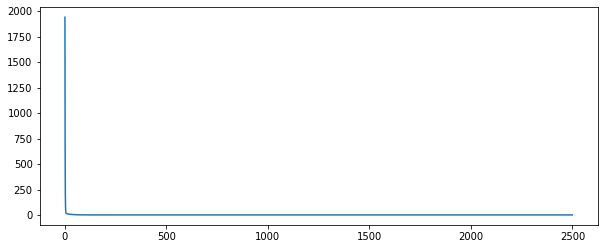

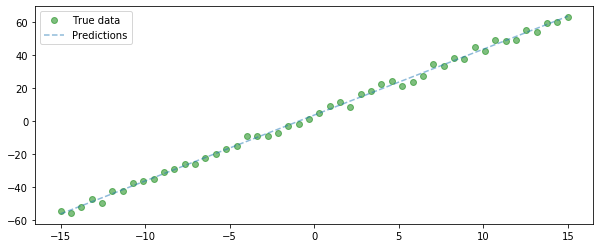

In [7]:
with torch.no_grad():
    yP = model(x)

plt.figure(figsize=(10,4))
plt.plot(range(epochs), lossV)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x.data.numpy(), y.data.numpy(), 'go', label='True data', alpha=0.5)
plt.plot(x.data.numpy(), yP.data.numpy(), '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()